# Analyzing fluorescent images with OpenCV in Python

Some more text

In [1]:
%matplotlib inline
# import libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def make_hsv(x):
    return cv2.cvtColor(x,cv2.COLOR_BGR2HSV)

In [3]:
image = cv2.imread("test_red.jpg")

# crop to exlude scale bar
width, length, _ = image.shape
image = image[:int(width*0.9), :]

print("dimensions of image: {}".format(image.shape))

dimensions of image: (468, 692, 3)


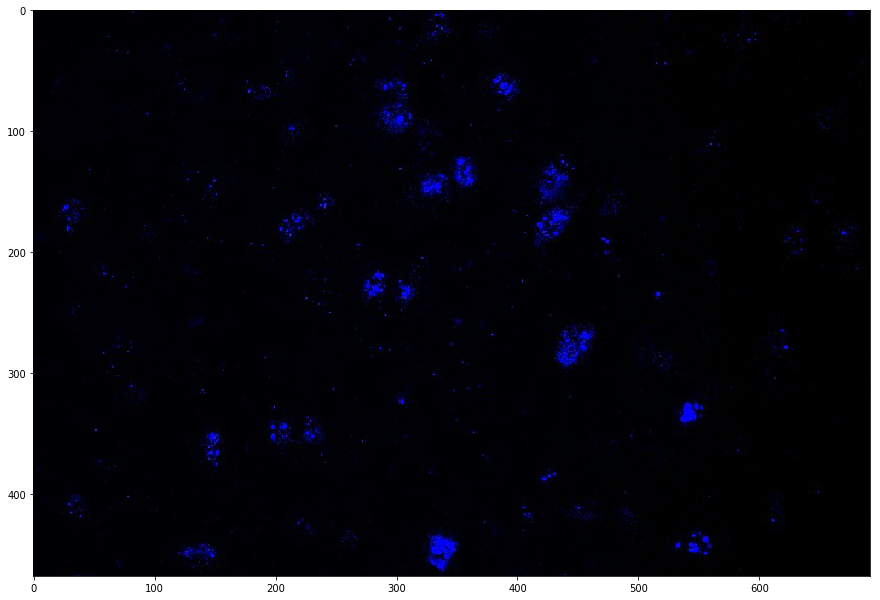

In [4]:
plt.figure(figsize=(15,15))
plt.imshow(image)
plt.show()

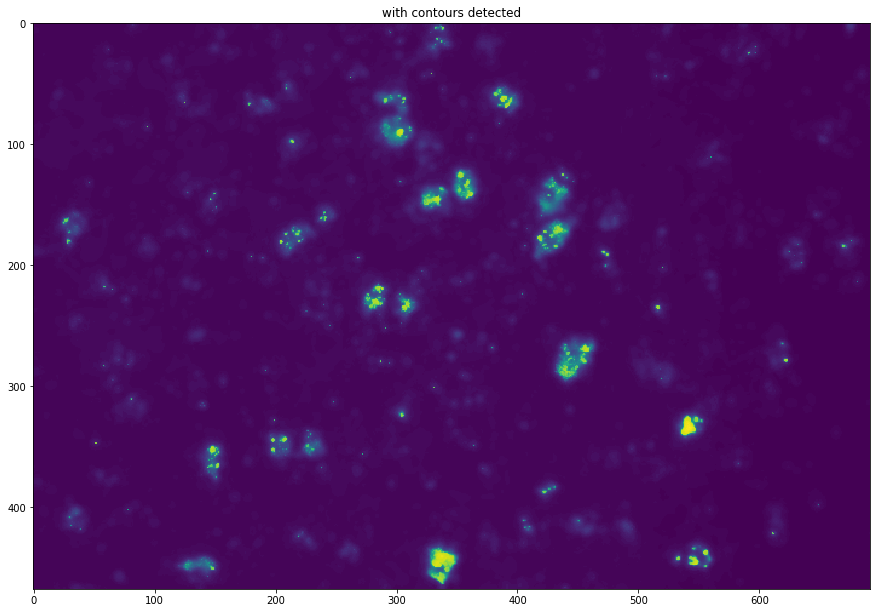

In [5]:
# blur
# blur = cv2.blur(image,(10,10))
blur = cv2.bilateralFilter(image ,9,75,75)

# convert to HSV
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15,15))
plt.imshow(gray)
plt.title("with contours detected")

plt.show()

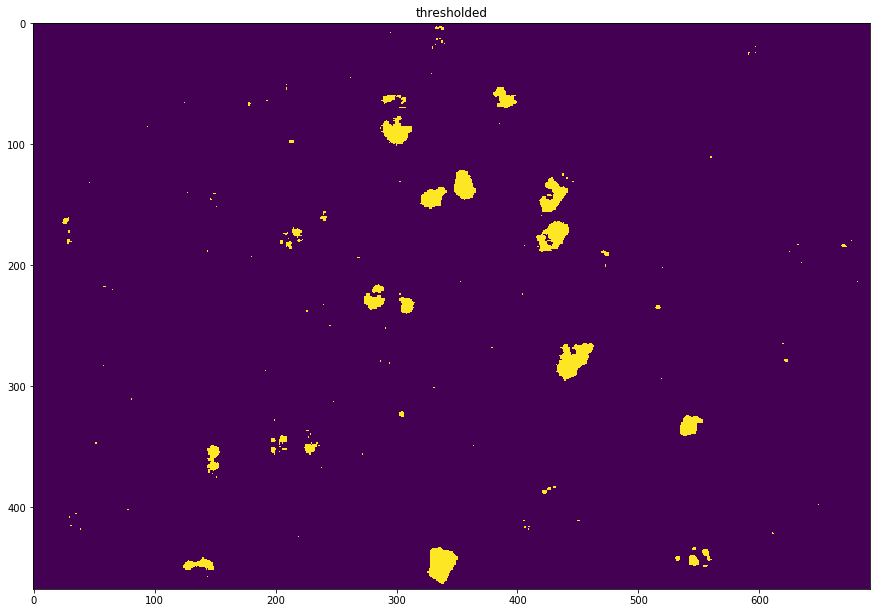

In [6]:
ret,thresh = cv2.threshold(gray,20,255,cv2.THRESH_BINARY)

plt.figure(figsize=(15,15))
plt.title("thresholded")
plt.imshow(thresh)
plt.show()

28, 139


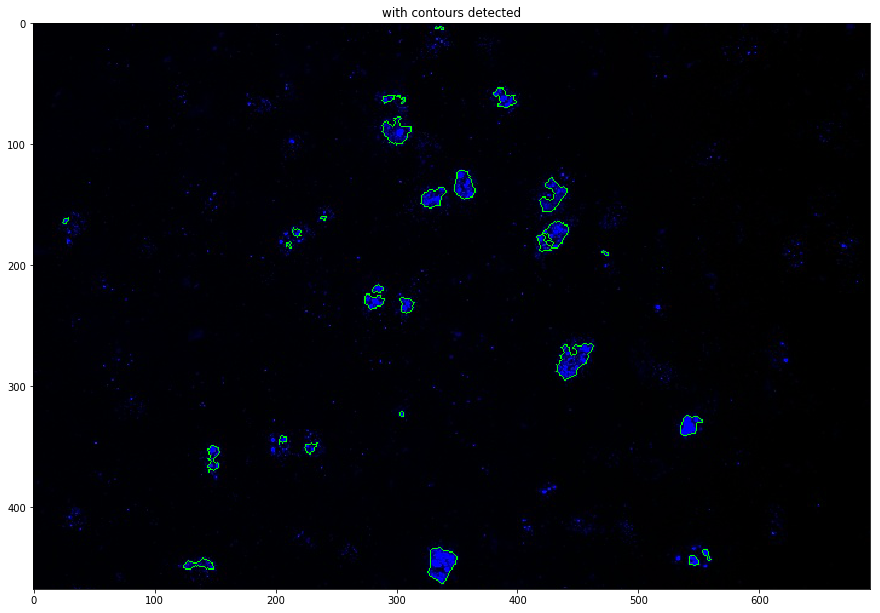

In [7]:
_, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# sizes = []
# for c in contours:
#     sizes.append(cv2.contourArea(c))
# print(sizes)

big_countours = [c for c in contours if cv2.contourArea(c) > 10]

print("{}, {}".format(len(big_countours), len(contours)))

cv2.drawContours(image, big_countours, -1, (0,255,0), 1)

plt.figure(figsize=(15,15))
plt.imshow(image)
plt.title("with contours detected")
plt.show()

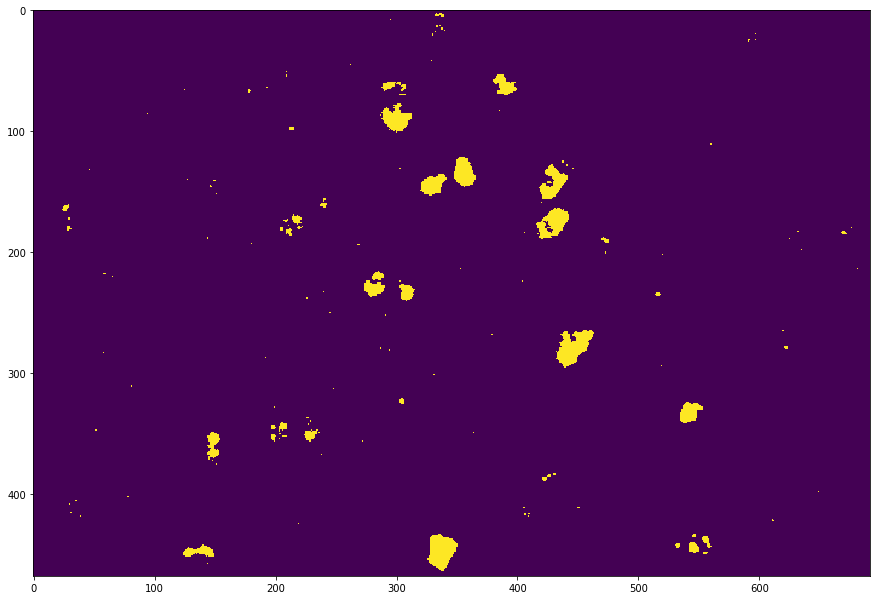

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

In [8]:
plt.figure(figsize=(15,15))
plt.imshow(thresh)
plt.show()

thresh[:5,:5]

## look at green image

28, 139


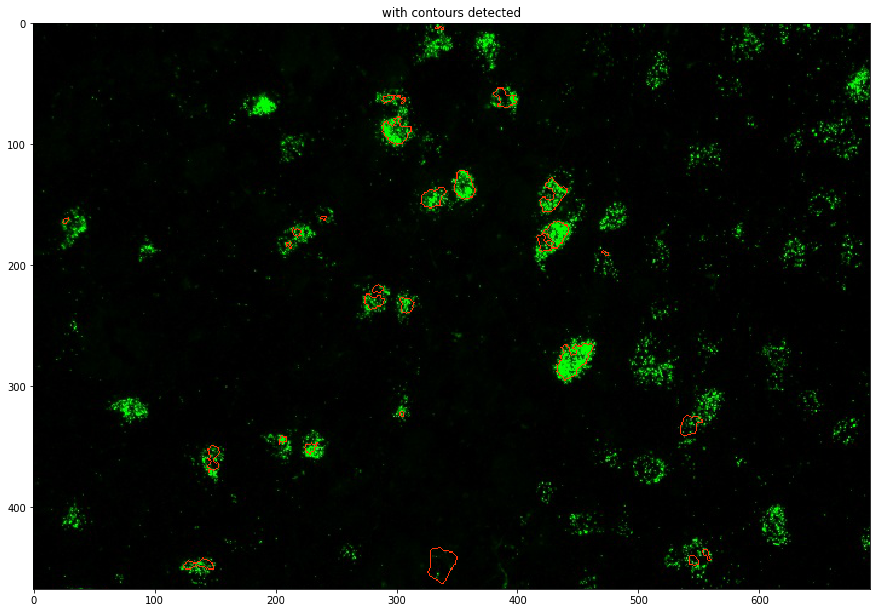

In [9]:
image = cv2.imread("test_green.jpg")

# crop to exlude scale bar
width, length, _ = image.shape
image = image[:int(width*0.9), :]

blur = cv2.bilateralFilter(image ,9,75,75)

gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

ret,thresh2 = cv2.threshold(gray,20,255,cv2.THRESH_BINARY)

_, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# sizes = []
# for c in contours:
#     sizes.append(cv2.contourArea(c))
# print(sizes)

big_countours = [c for c in contours if cv2.contourArea(c) > 10]

print("{}, {}".format(len(big_countours), len(contours)))

cv2.drawContours(image, big_countours, -1, (255,54,10), 1)

plt.figure(figsize=(15,15))
plt.imshow(image)
plt.title("with contours detected")
plt.show()

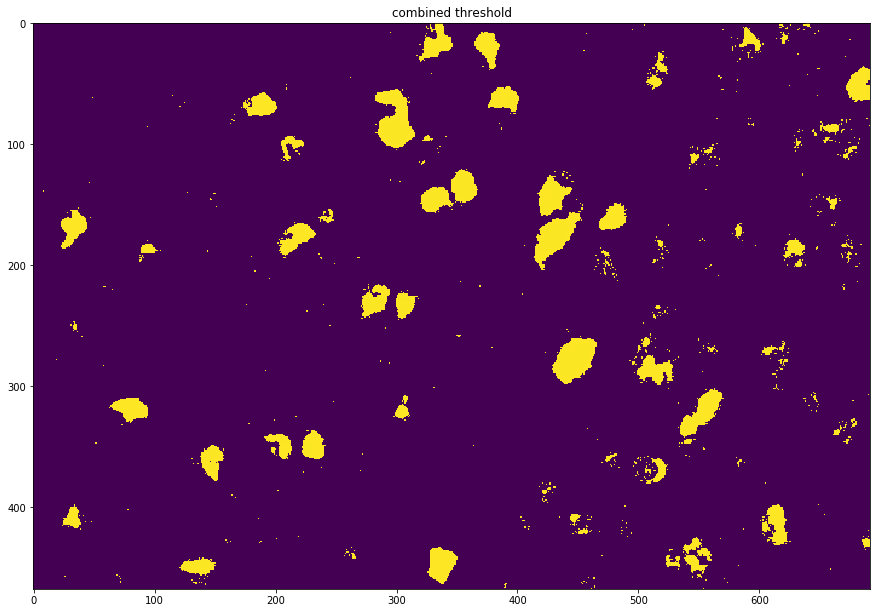

In [10]:
thresh_combined = thresh + thresh2

plt.figure(figsize=(15,15))
plt.imshow(thresh_combined)
plt.title("combined threshold")
plt.show()

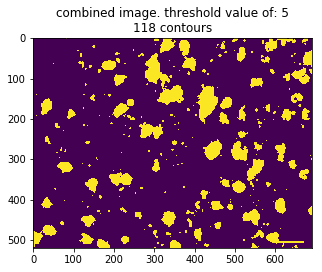

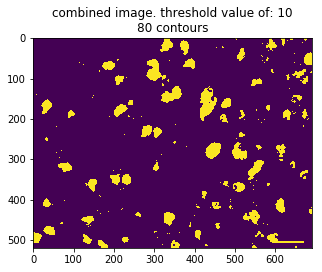

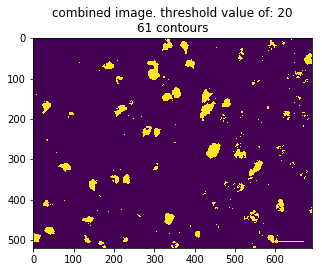

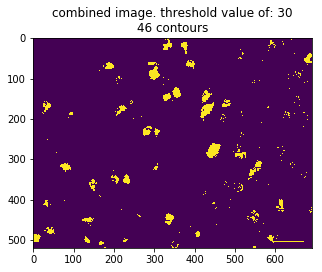

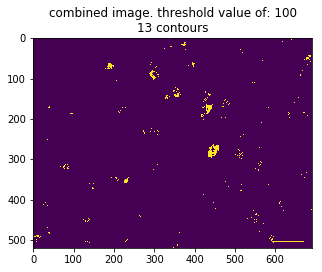

In [119]:
def threshold(x, threshold_parameter = 20):
    
    # crop to exlude scale bar
#     width, length, _ = x.shape
#     x = x[:int(width*0.9), :]

    blur = cv2.bilateralFilter(x, 9 ,75 ,75)

    gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

    ret, thresh = cv2.threshold(gray,threshold_parameter,255,cv2.THRESH_BINARY)

#     big_countours = [c for c in contours if cv2.contourArea(c) > min_size]

#     cv2.drawContours(image, big_countours, -1, (255,54,10), 1)

    return thresh



thresholds = [5, 10, 20, 30, 100]

image1 = cv2.imread("test_green.jpg")
image2 = cv2.imread("test_red.jpg")

for thresh in thresholds:
    thresh1 = threshold(image1, threshold_parameter = thresh)
    thresh2 = threshold(image2, threshold_parameter = thresh)
    
    thresh_combined = thresh2 + thresh1
    
    _, contours, hierarchy = cv2.findContours(thresh_combined, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    big_countours = [c for c in contours if cv2.contourArea(c) > 20]    
    
    plt.figure(figsize = (5,5))
    plt.imshow(thresh_combined)
    plt.title("combined image. threshold value of: {}\n{} contours".format(thresh, len(big_countours)))
    plt.show()

Based on this, I'm going to use a threshold value of 10 when thresholding the photos. The combined image might make a nice map that we can layer onto each of the original photos.

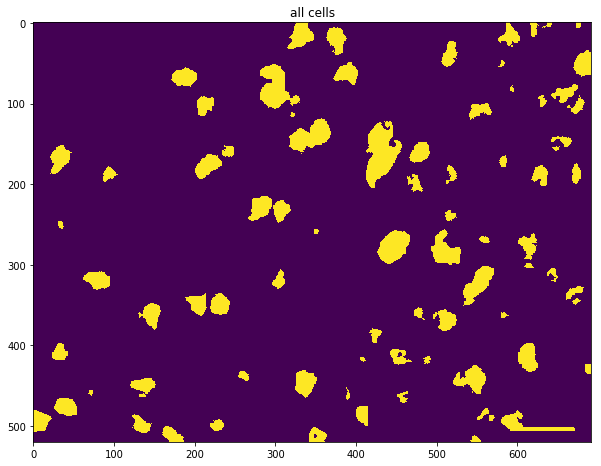

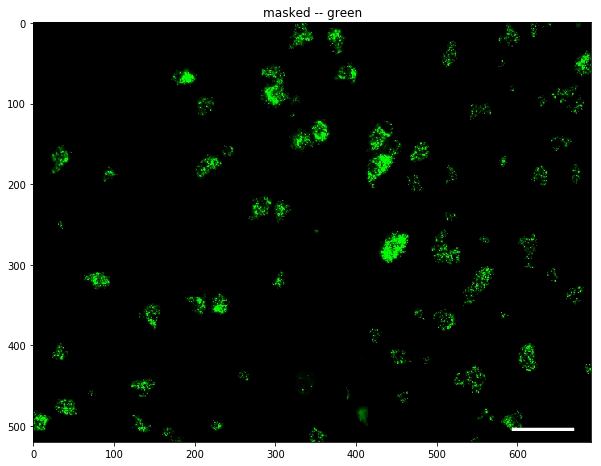

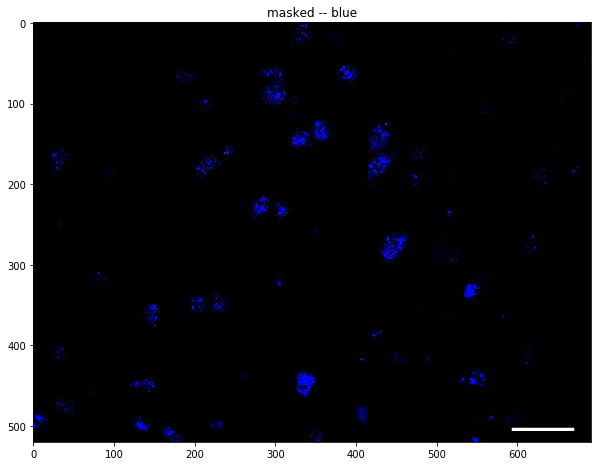

In [61]:
image1 = cv2.imread("test_green.jpg")
image2 = cv2.imread("test_red.jpg")

thresh1 = threshold(image1, threshold_parameter = 10)
thresh2 = threshold(image2, threshold_parameter = 10)

# combine
thresh_combined = thresh2 + thresh1

# get contours from the combined images to define cells
# create blank image
mask = np.zeros(thresh_combined.shape, np.uint8)
# get contours
_, contours, hierarchy = cv2.findContours(thresh_combined.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# exclude tiny contours
big_countours = [c for c in contours if cv2.contourArea(c) > 15]
# draw onto mask
cv2.drawContours(mask, big_countours, -1, (255), -1)

# mask = cv2.bitwise_not(thresh_combined)
res2 = cv2.bitwise_and(image2, image2, mask = mask)
res1 = cv2.bitwise_and(image1, image1, mask = mask)

plt.figure(figsize = (10,10))
plt.imshow(mask)
plt.title("all cells")
plt.show()

plt.figure(figsize = (10,10))
plt.imshow(res1)
plt.title("masked -- green")
plt.show()

plt.figure(figsize = (10,10))
plt.imshow(res2)
plt.title("masked -- blue")
plt.show()

In [151]:
# store list of contours from the combined image
## already in big contours

def get_images(x, threshold_parameter = 20):
    blur = cv2.bilateralFilter(x, 9 ,75 ,75)
    gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,threshold_parameter,255,cv2.THRESH_BINARY)
    return gray, thresh


# apply to image 1
# for each contour, get the average intensity
image1_intensity = []
image2_intensity = []

print("number of contours: {}".format(len(big_countours)))

image1= cv2.imread("test_red.jpg")
image1_copy = image1.copy()
image2 = cv2.imread("test_green.jpg")
image2_copy = image2.copy()

cats = []

for i in range(len(big_countours)):
    # read in images
    gray1, mask1 = get_images(image1)
    gray2, mask2 = get_images(image2)
    
    temp1_1 = np.zeros(image1.shape,np.uint8)
    temp1_2 = np.zeros(gray1.shape,np.uint8)
    temp2_1 = np.zeros(image2.shape,np.uint8)
    temp2_2 = np.zeros(gray2.shape,np.uint8)
    
    cv2.drawContours(temp1_2, big_countours, i, 255, -1)
    cv2.drawContours(temp1_2, big_countours, i, cv2.mean(image1, temp1_2),-1)    
    cv2.drawContours(temp2_2, big_countours, i, 255, -1)
    cv2.drawContours(temp2_2, big_countours, i, cv2.mean(image2, temp2_2),-1)
    
    image1_intensity.append(cv2.mean(image1, temp1_2))
    image2_intensity.append(cv2.mean(image2, temp2_2))    
    
    blue_intensity = cv2.mean(image1, temp1_2)[0]
    green_intensity =  cv2.mean(image2, temp2_2)[1]
    
    M = cv2.moments(big_countours[i])
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    cv2.putText(image1,"{}".format(round(blue_intensity,1)), (cx,cy), cv2.FONT_HERSHEY_SIMPLEX, 0.33, 255)
    cv2.putText(image2,"{}".format(round(green_intensity,1)), (cx,cy), cv2.FONT_HERSHEY_SIMPLEX, 0.33, 255)

    
    if blue_intensity >= 3 and green_intensity >= 30:
        cats.append("colocation")
    elif blue_intensity >= 3 and green_intensity < 30:
        cats.append("blue")
    elif blue_intensity < 3 and green_intensity > 30:
        cats.append("green")


# cats = []
# for blue, green in zip(blue_list, green_list):
#     if blue >= 10 and green >= 10:
#         cats.append("coexpression")
#     elif blue > 10 and green < 10:
#         cats.append("blue_expression")
#     elif blue < 10 and green >= 10:
#         cats.append("green_expression")

number of contours: 83


NameError: name 'y' is not defined

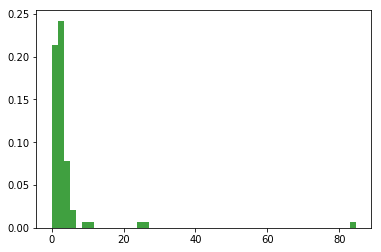

In [152]:
blue= []
for x in image1_intensity:
    blue.append(x[0])

n, bins, patches = plt.hist(blue, 50, normed=1, facecolor='green', alpha=0.75)

l = plt.plot(bins, y, 'r--', linewidth=1)
plt.title("distribution of blue in the cells")
plt.show()

[22.666666666666668, 47.60567823343849, 6.566666666666666, 22.95639534883721, 61.22099447513812, 58.3469387755102, 55.0, 118.41509433962264, 99.33480176211454, 45.956043956043956, 49.74576271186441, 72.352, 51.75, 40.888888888888886, 43.714285714285715, 38.297872340425535, 67.0, 42.43589743589744, 9.486153846153845, 48.30855018587361, 56.92045454545455, 0.0, 27.43859649122807, 43.086687306501545, 10.048780487804878, 68.44992295839754, 56.73287671232877, 33.15568862275449, 58.883720930232556, 51.515592515592516, 49.829268292682926, 64.43761996161228, 53.43478260869565, 92.35496957403652, 61.24122807017544, 49.58469945355191, 89.39169675090253, 63.270270270270274, 44.39090909090909, 56.00625651720542, 42.674418604651166, 45.956043956043956, 38.03695150115473, 137.8334771354616, 56.791449426485926, 36.27777777777778, 52.88461538461539, 36.48031496062992, 65.92481203007519, 63.327302631578945, 38.057377049180324, 59.65686274509804, 52.02770083102493, 43.331288343558285, 41.886138613861384,

NameError: name 'y' is not defined

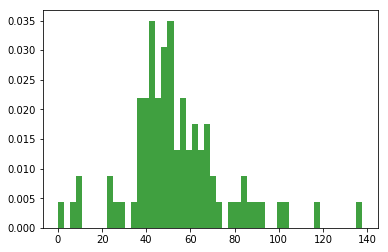

In [153]:


green= []
for x in image2_intensity:
    green.append(x[1])
n, bins, patches = plt.hist(green, 50, normed=1, facecolor='green', alpha=0.75)
print(green)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.title("distribution of green in the cells")
plt.show()


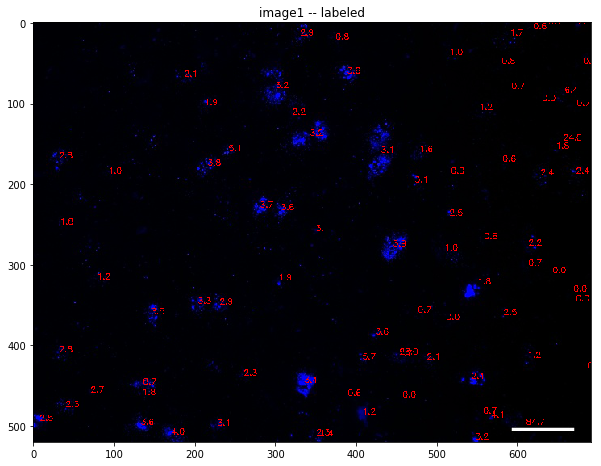

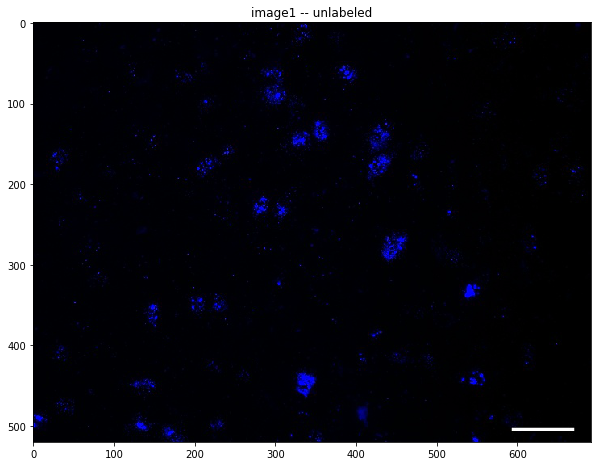

In [154]:

plt.figure(figsize = (10,10))
plt.imshow(image1)
plt.title("image1 -- labeled")
plt.show()

plt.figure(figsize = (10,10))
plt.imshow(image1_copy)
plt.title("image1 -- unlabeled")
plt.show()

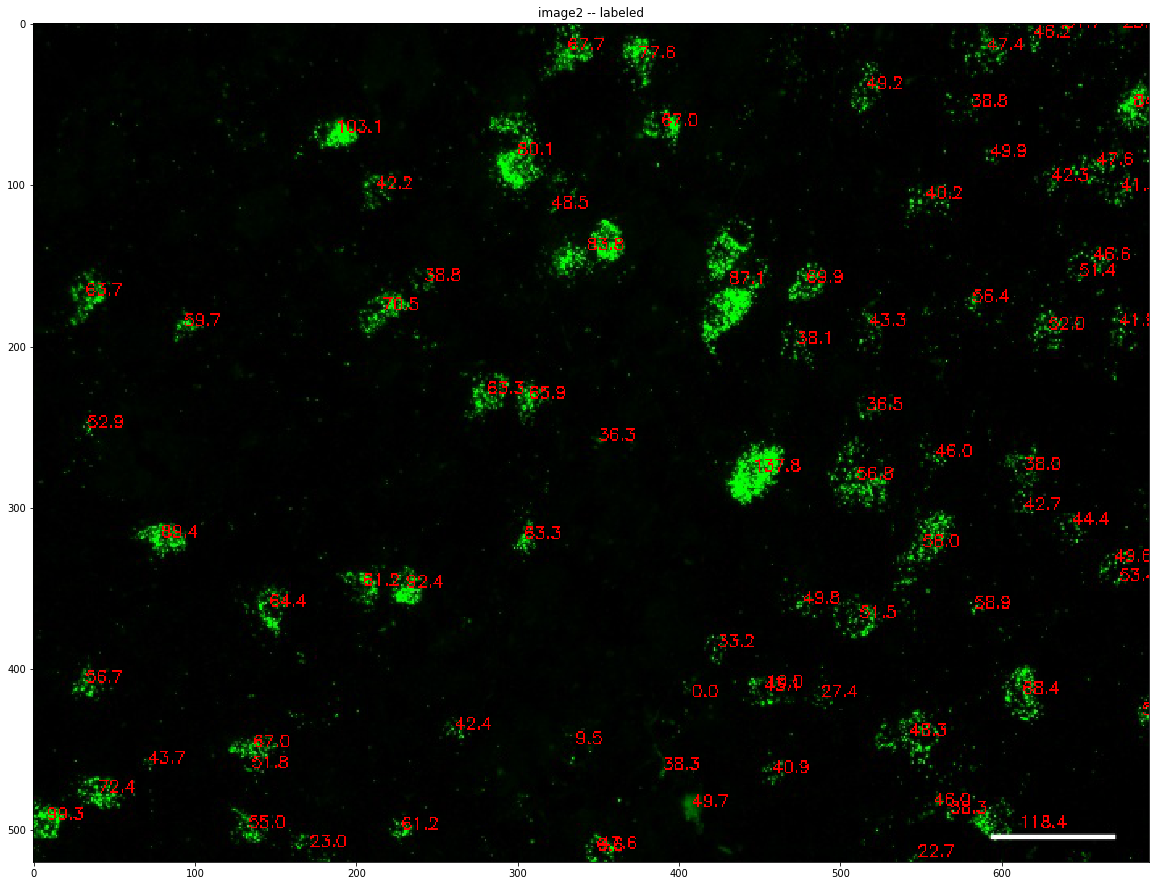

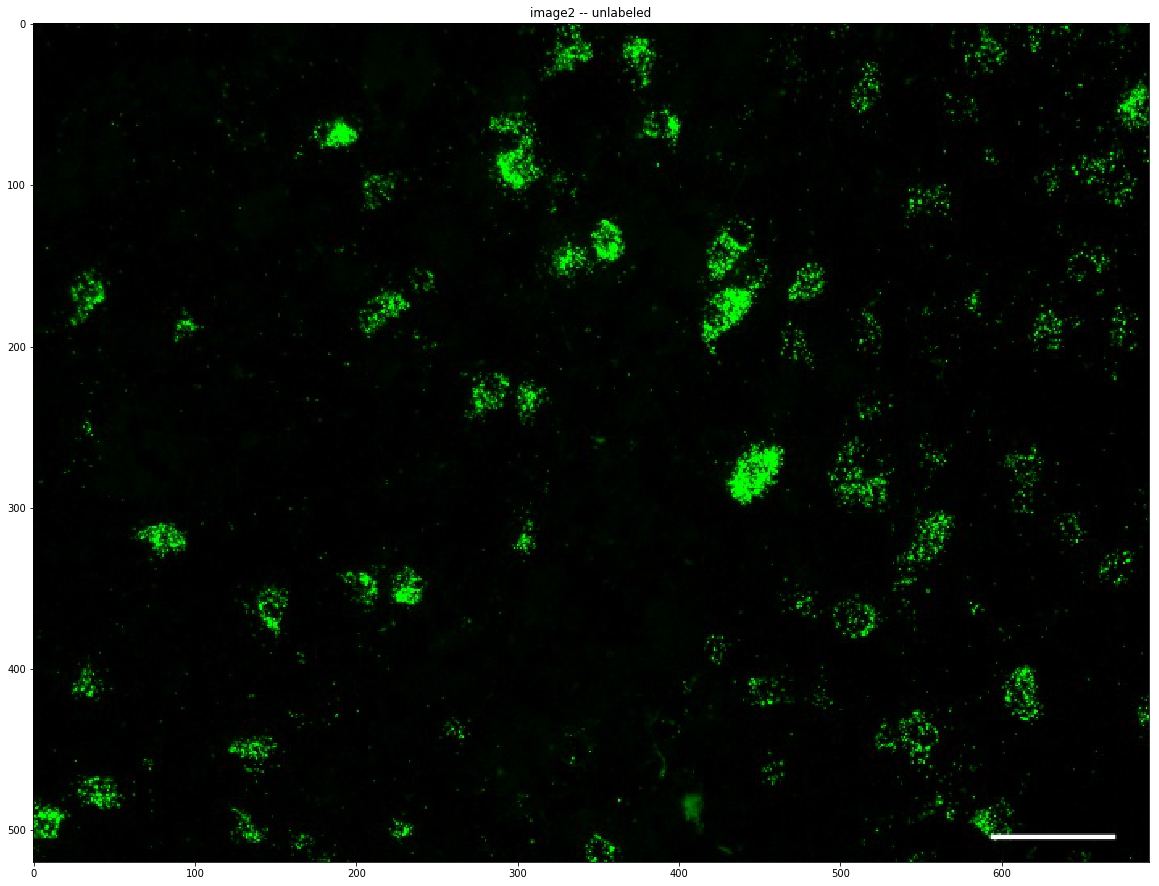

In [155]:

plt.figure(figsize = (20,20))
plt.imshow(image2)
plt.title("image2 -- labeled")
plt.show()

plt.figure(figsize = (20,20))
plt.imshow(image2_copy)
plt.title("image2 -- unlabeled")
plt.show()

In [156]:
import pandas as pd

s = pd.Series(cats, dtype="category")

s.value_counts()

green         54
colocation    21
blue           6
dtype: int64

## playing with thte watershed algorithm

#### opencv

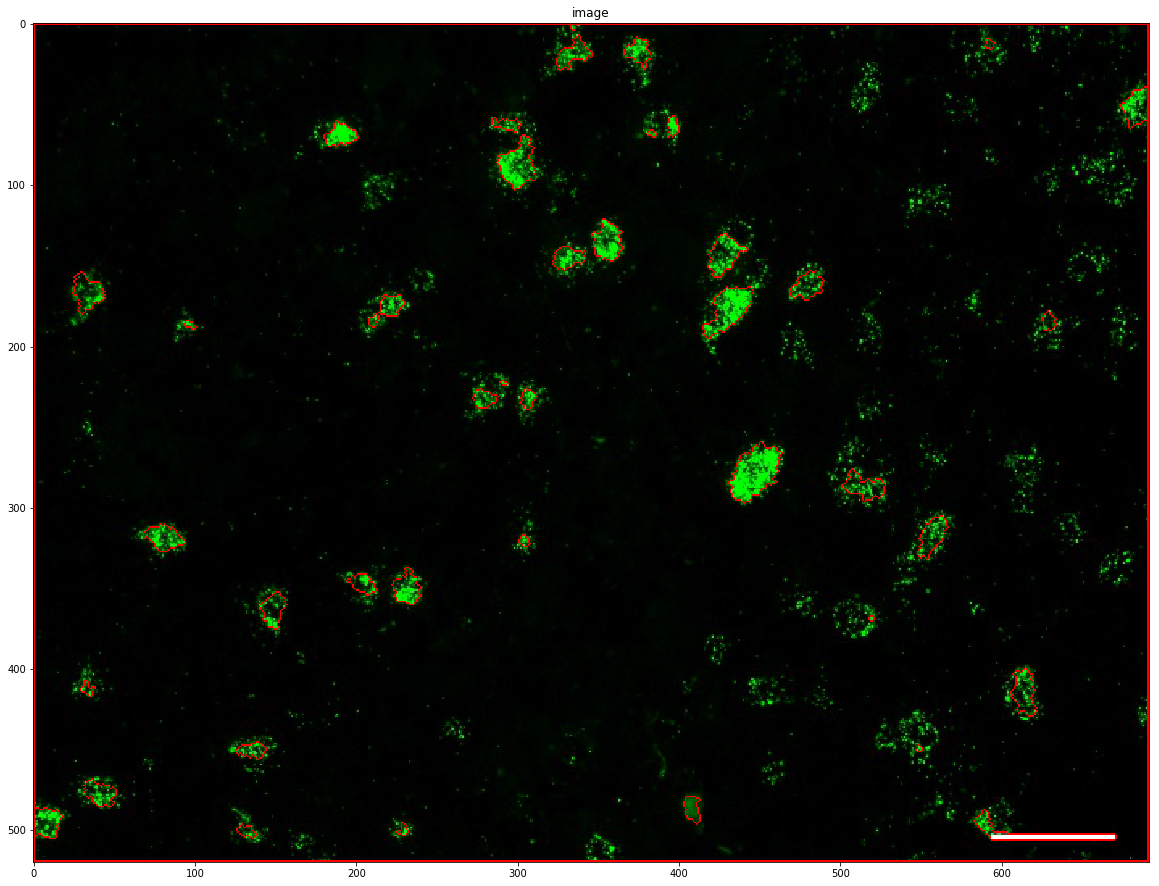

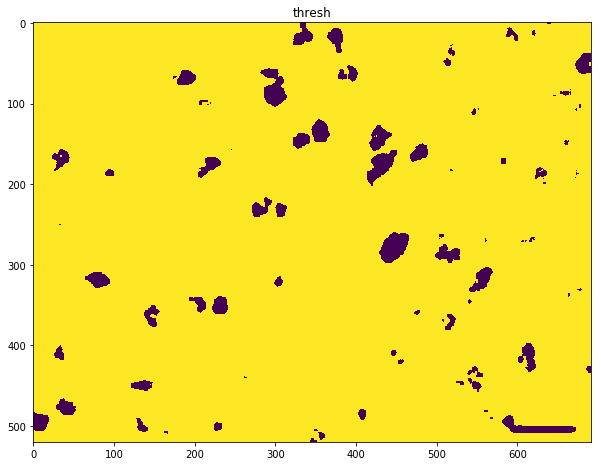

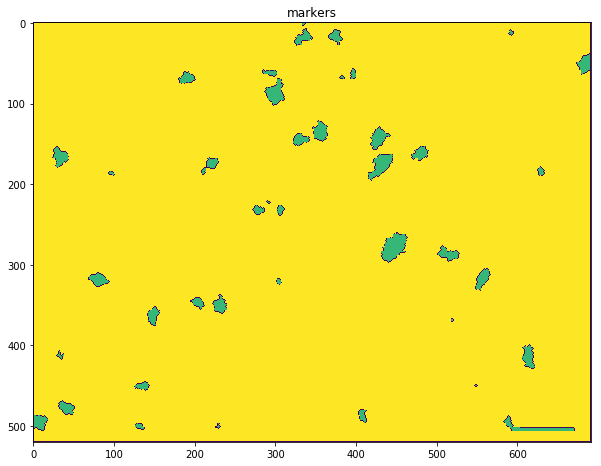

In [29]:
image = cv2.imread("test_green.jpg")

# blur = cv2.bilateralFilter(image, 9 ,75 ,75)

blur = cv2.blur(image, (7,7))

gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 20, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# from http://docs.opencv.org/3.1.0/d3/db4/tutorial_py_watershed.html
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

sure_bg = cv2.dilate(opening,kernel,iterations=3)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# label markers
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0

markers = cv2.watershed(image, markers)
image[markers == -1] = [255,0,0]


plt.figure(figsize = (20,20))
plt.imshow(image)
plt.title("image")
plt.show()


plt.figure(figsize = (10,10))
plt.imshow(thresh)
plt.title("thresh")
plt.show()

plt.figure(figsize = (10,10))
plt.imshow(markers)
plt.title("markers")
plt.show()

#### scikit-image + opencv

In [11]:
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import numpy as np
import cv2

import matplotlib.pyplot as plt

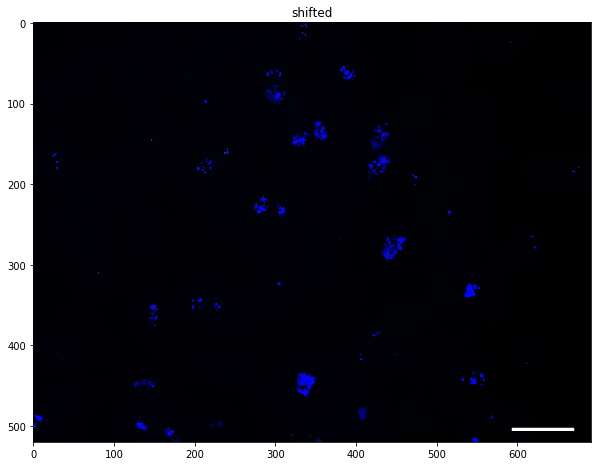

In [12]:
# read in image
image = cv2.imread('test_red.jpg')

# smooth
shifted = cv2.pyrMeanShiftFiltering(image, 21, 31)

plt.figure(figsize = (10,10))
plt.imshow(shifted)
plt.title("shifted")
plt.show()

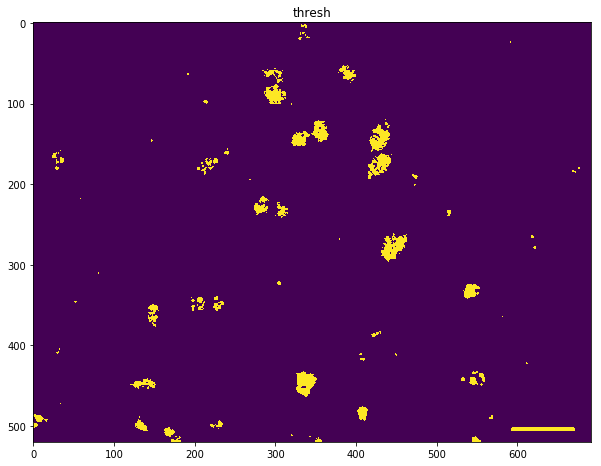

In [13]:
# convert to gray
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)

# threshold
_, thresh = cv2.threshold(gray, 5, 255, cv2.THRESH_BINARY)

plt.figure(figsize = (10,10))
plt.imshow(thresh)
plt.title("thresh")
plt.show()

In [14]:
# compute the exact Euclidean distance from every binary
# pixel to the nearest zero pixel, then find peaks in this
# distance map
D = ndimage.distance_transform_edt(thresh)
localMax = peak_local_max(D, indices=False, min_distance=10, labels=thresh)

# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print(labels)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[INFO] 68 unique segments found


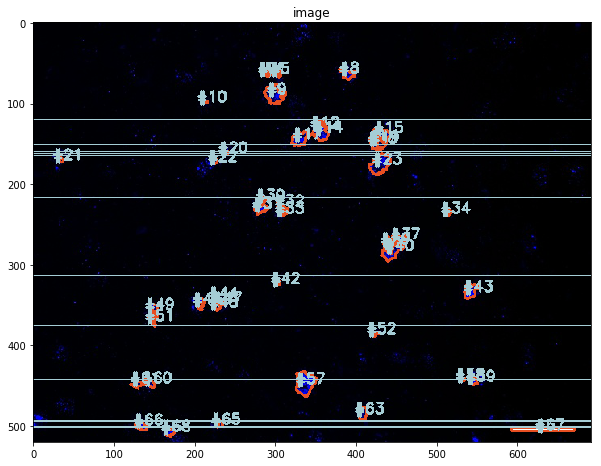

In [15]:
# loop over the unique labels returned by the Watershed
# algorithm
for label in np.unique(labels):
    # if the label is zero, we are examining the 'background'
    # so simply ignore it
    if label == 0:
        continue

    # otherwise, allocate memory for the label region and draw
    # it on the mask
    mask = np.zeros(gray.shape, dtype="uint8")
    mask[labels == label] = 255

    # detect contours in the mask and grab the largest one
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)[-2]
    c = max(cnts, key=cv2.contourArea)
    if cv2.contourArea(c) > 10:
        # draw the contour on the image
        cv2.drawContours(image, [c], 0, (232,79,34), 2)
        # draw a circle enclosing the object
        ((x, y), r) = cv2.minEnclosingCircle(c)
#         cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 2)
        cv2.putText(image, "#{}".format(label), (int(x) - 10, int(y)),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (165,205,213), 2)

plt.figure(figsize = (10,10))
plt.imshow(image)
plt.title("image")
plt.show()    

In [48]:
# make function to automate the above:

def watershed_seg(image1, image2, thresh_min = 5, min_dist = 10):
    
    # based on http://www.pyimagesearch.com/2015/11/02/watershed-opencv/
    
    # create lists to store the intensities of light in each cell in each of the two images
    image1_intensity = []
    image2_intensity = []
    
    # make copies of the images
    image1 = image1.copy()
    image2 = image2.copy()
    
    # we also create a combined image to draw on
    combined = cv2.addWeighted(image1, 0.5, image2, 0.5, 0)
    
    shifted1 = cv2.bilateralFilter(image1 ,9,75,75)
    gray1 = cv2.cvtColor(shifted1, cv2.COLOR_BGR2GRAY)
    _, thresh1 = cv2.threshold(gray1, thresh_min, 255, cv2.THRESH_BINARY)
    
    shifted2 = cv2.bilateralFilter(image2 ,9,75,75)
    gray2 = cv2.cvtColor(shifted2, cv2.COLOR_BGR2GRAY)
    _, thresh2 = cv2.threshold(gray2, thresh_min, 255, cv2.THRESH_BINARY)
    
    # combine thresholding images
    thresh = thresh2 + thresh1
    
    # stuff to do the watershed segmentation
    # note that this is on the combined thresh image
    # so the contours are assumed to be cells
    D = ndimage.distance_transform_edt(thresh)
    localMax = peak_local_max(D, indices=False, min_distance=min_dist, labels=thresh)
    markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
    labels = watershed(-D, markers, mask=thresh)
    
    # each 'contour' according to the watershed seg is labeled a different number, so we loop through each
    for label in np.unique(labels):
    # if the label is zero, we are examining the 'background'
    # so simply ignore it
        if label == 0:
            continue

        # otherwise, allocate memory for the label region and draw
        # it on the mask
        mask = np.zeros(gray1.shape, dtype="uint8")
        mask[labels == label] = 255
        
        ## need to: 
        ## apply the labels to the combined `thresh` image
        ## apply the contours in the mask to each greyscale image
        ## find the average intensity inside the labeled parts of each greyscale image
        ## cv2.mean(image, mask)

        # detect contours in the mask and grab the largest one
        contours = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
        c = max(contours, key = cv2.contourArea)
        
        # if the contour is large enough, we assume it's a cell.
        # we then reference the original image and find the average color in the contour region
        # in each of the original photos 
        
        if cv2.contourArea(c) > 20:
            
            # find the average intensity of the first image in the contour
            mask = np.zeros(gray1.shape,np.uint8)
            cv2.drawContours(mask,[c],0,255,-1)
            avg1 = cv2.mean(gray1, mask = mask)[0]
            image1_intensity.append(avg1)
            
            # find the average intensity of the second image in the contour
            mask = np.zeros(gray2.shape,np.uint8)
            cv2.drawContours(mask,[c],0,255,-1)
            avg2 = cv2.mean(gray2, mask = mask)[0]
            image2_intensity.append(avg2)
            
            # classify
            if avg1 >= 15 and avg2 >= 15:
                text = "both"
            elif avg1 >= 15 and avg2 < 15:
                text = "image1"
            elif avg1 < 15 and avg2 >= 15:
                text = "image2"
            
            # draw the contour on the combined image
            cv2.drawContours(combined, [c], 0, (232,79,34), 1)
            # draw a circle enclosing the object
            ((x, y), r) = cv2.minEnclosingCircle(c)
            cv2.putText(combined, "{}".format(text), (int(x) - 10, int(y)),cv2.FONT_HERSHEY_SIMPLEX, 0.4, (165,205,213), 1)

    plt.figure(figsize = (20,20))
    plt.imshow(combined)
    plt.title("combined")
    plt.show()
    return combined, image1_intensity, image2_intensity
    

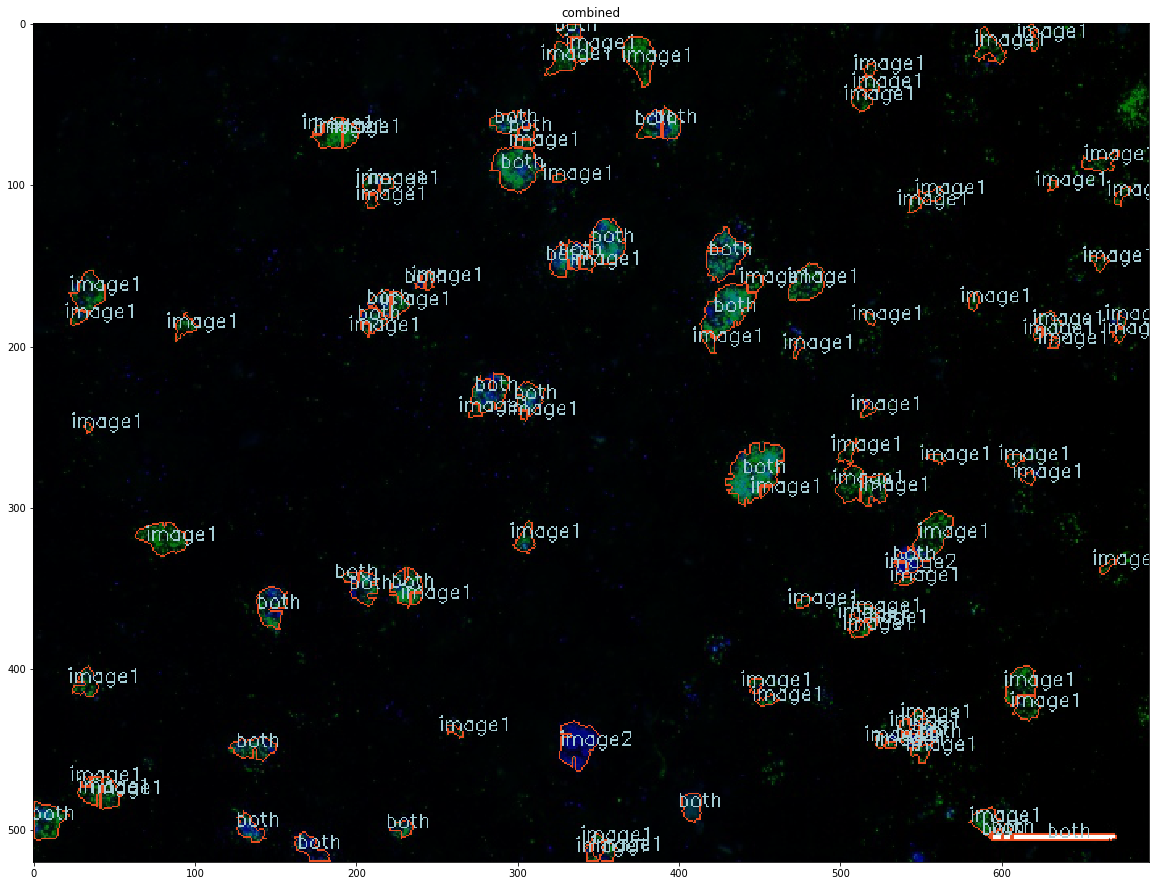

True

In [49]:
green_image = cv2.imread('test_green.jpg')
red_image = cv2.imread('test_red.jpg')

combined_image, image1_list, image2_list = watershed_seg(green_image, red_image, min_dist = 5, thresh_min = 15)

cv2.imwrite('/Users/lukereding/Documents/detect_fluorescent_overlap/green_contour.jpg', combined_image)

In [64]:
# show histograms of image 1 and image 2 intensity expression
# (may help inform parameter choices about)

import pandas as pd
from bokeh.charts import Histogram, show, output_notebook


df = pd.DataFrame({'image_1': image1_list, 'image_2' : image2_list, 'cell' : list(range(1, len(image1_list) + 1))})

# number of cells identified
df.shape[0]

df = df.melt(id_vars=['cell'])

hist = Histogram(df, values='value', color='variable',
                  title="", xlabel = "intensity", ylabel = "number", legend='top_right')
output_notebook()

show(hist)

Loading BokehJS ...